# 首先，确保环境配置好，在z_do_配置_预训练.ipynb
# 下载整理好的数据集
Kaggle原版数据集：https://www.kaggle.com/datasets/humansintheloop/semantic-segmentation-of-aerial-imagery

In [1]:
import os
os.chdir('./mmsegmentation')

In [3]:
# 确保自己的目录是正确的
os.getcwd()

'/root/autodl-tmp/mmseg/mmsegmentation'

In [4]:
# 下载数据
!rm -rf Dubai-dataset.zip Dubai-dataset

!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/Dubai-dataset.zip

!unzip Dubai-dataset.zip >> /dev/null # 解压

!rm -rf Dubai-dataset.zip # 删除压缩包

--2023-06-14 11:44:24--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/Dubai-dataset.zip
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29822458 (28M) [application/zip]
Saving to: ‘Dubai-dataset.zip’

Dubai-dataset.zip   100%[===================>]  28.44M  65.2MB/s    in 0.4s    

2023-06-14 11:44:25 (65.2 MB/s) - ‘Dubai-dataset.zip’ saved [29822458/29822458]



## 删除系统自动生成的多余文件
### 查看待删除的多余文件
删除完成之后，再验证也是通过这3行命令

In [5]:
!find . -iname '__MACOSX'

In [6]:
!find . -iname '.DS_Store'

In [7]:
!find . -iname '.ipynb_checkpoints'

./.ipynb_checkpoints


### 删除多余文件

In [8]:
!for i in `find . -iname '__MACOSX'`; do rm -rf $i;done

In [9]:
!for i in `find . -iname '.DS_Store'`; do rm -rf $i;done

In [10]:
!for i in `find . -iname '.ipynb_checkpoints'`; do rm -rf $i;done

# 可视化数据集

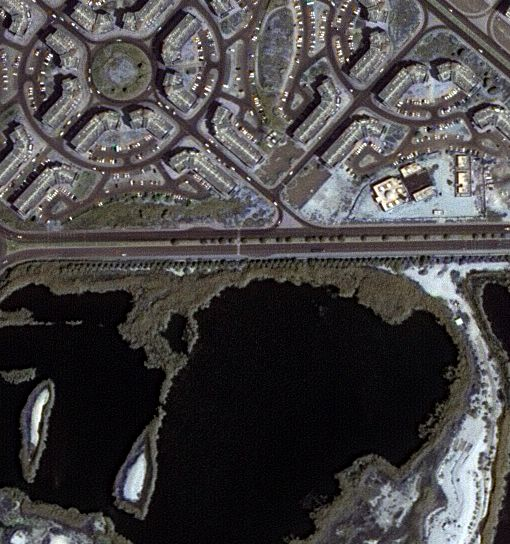

In [12]:
# 查看单张图像及其语义分割标注
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline


# 指定单张图像路径
img_path = 'Dubai-dataset/img_dir/train/14.jpg'
mask_path = 'Dubai-dataset/ann_dir/train/14.png'

Image.open(img_path)

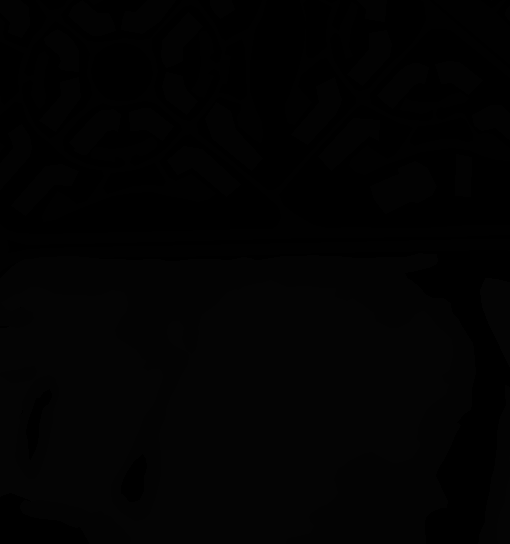

In [12]:
Image.open(mask_path)

In [14]:
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

In [28]:
img.shape

(1479, 2149, 3)

In [15]:
# mask 语义分割标注，与原图大小相同
np.unique(mask)

array([0, 1, 2, 3, 4], dtype=uint8)

| 类别编号 | 类别名称   |
| -------- | ---------- |
| 0        | Land       |
| 1        | Road       |
| 2        | Building   |
| 3        | Vegetation |
| 4        | Water      |
| 5        | Unlabeled  |

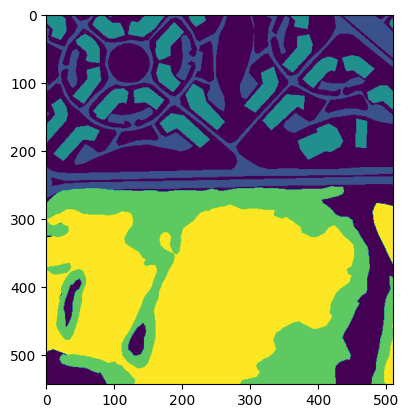

In [16]:
# 可视化语义分割标注
plt.imshow(mask[:,:,0])
plt.show()

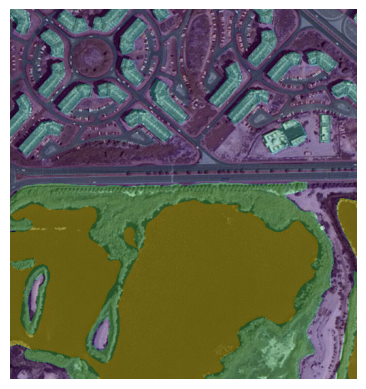

In [17]:
# 叠加到原图上显示
plt.imshow(img[:,:,::-1])
plt.imshow(mask[:,:,0], alpha=0.4) # alpha 高亮区域透明度，越小越接近原图
plt.axis('off')
plt.show()

# 配置文件
这个过程如果需要改变*数据集类*、*训练及测试pipeline*，需要下载或者自己写配置文件（.py），然后替换掉原来的配置文件 \
配置文件也自己下载好算了：\
```
!rm -rf configs/pspnet/pspnet_r50-d8_4xb2-40k_DubaiDataset.py # 删除原有文件
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/pspnet_r50-d8_4xb2-40k_DubaiDataset.py -P configs/pspnet
```


In [21]:
# 下载数据集配置文件（也可以自己手动改配置文件，本质都是py文件，通过文件定义了一些参数）
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/DubaiDataset.py -P mmseg/datasets

--2023-06-14 11:49:04--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/DubaiDataset.py
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 867 [binary/octet-stream]
Saving to: ‘mmseg/datasets/DubaiDataset.py’

DubaiDataset.py     100%[===================>]     867  --.-KB/s    in 0s      

2023-06-14 11:49:04 (28.6 MB/s) - ‘mmseg/datasets/DubaiDataset.py’ saved [867/867]



In [22]:
# 替换init.py文件，就是给我们自定义的数据集配置文件进行注册
!rm -rf mmseg/datasets/__init__.py # 删除原有文件
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/__init__.py -P mmseg/datasets

--2023-06-14 11:49:08--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/__init__.py
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2620 (2.6K) [binary/octet-stream]
Saving to: ‘mmseg/datasets/__init__.py’

__init__.py         100%[===================>]   2.56K  --.-KB/s    in 0s      

2023-06-14 11:49:08 (73.5 MB/s) - ‘mmseg/datasets/__init__.py’ saved [2620/2620]



In [23]:
# 管道配置文件也是一样的要改变
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/DubaiDataset_pipeline.py -P configs/_base_/datasets

--2023-06-14 11:49:11--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/DubaiDataset_pipeline.py
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2268 (2.2K) [binary/octet-stream]
Saving to: ‘configs/_base_/datasets/DubaiDataset_pipeline.py’

DubaiDataset_pipeli 100%[===================>]   2.21K  --.-KB/s    in 0s      

2023-06-14 11:49:11 (99.5 MB/s) - ‘configs/_base_/datasets/DubaiDataset_pipeline.py’ saved [2268/2268]



In [19]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/pspnet_r50-d8_4xb2-40k_DubaiDataset.py -P configs/pspnet

--2023-06-14 11:47:16--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/pspnet_r50-d8_4xb2-40k_DubaiDataset.py
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344 [binary/octet-stream]
Saving to: ‘configs/pspnet/pspnet_r50-d8_4xb2-40k_DubaiDataset.py’

pspnet_r50-d8_4xb2- 100%[===================>]     344  --.-KB/s    in 0s      

2023-06-14 11:47:16 (11.2 MB/s) - ‘configs/pspnet/pspnet_r50-d8_4xb2-40k_DubaiDataset.py’ saved [344/344]



In [13]:
# 载入配置文件
from mmengine import Config
cfg = Config.fromfile('./configs/pspnet/pspnet_r50-d8_4xb2-40k_DubaiDataset.py')

In [25]:
# 修改配置文件

cfg.norm_cfg = dict(type='BN', requires_grad=True) # 只使用GPU时，BN取代SyncBN
cfg.crop_size = (256, 256)
cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head

# 模型 decode/auxiliary 输出头，指定为类别个数
cfg.model.decode_head.num_classes = 6
cfg.model.auxiliary_head.num_classes = 6

cfg.train_dataloader.batch_size = 8

cfg.test_dataloader = cfg.val_dataloader

# 结果保存目录
cfg.work_dir = './work_dirs/DubaiDataset'

# 训练迭代次数
cfg.train_cfg.max_iters = 3000
# 评估模型间隔
cfg.train_cfg.val_interval = 400
# 日志记录间隔
cfg.default_hooks.logger.interval = 100
# 模型权重保存间隔
cfg.default_hooks.checkpoint.interval = 1500

# 随机数种子
cfg['randomness'] = dict(seed=0)

In [26]:
# 查看完整配置文件
print(cfg.pretty_text)

norm_cfg = dict(type='BN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(64, 64))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(256, 256)),
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='PSPHead',
        in_channels=2048,
        in_index=3,
        channels=51

In [27]:
# 保存配置文件
cfg.dump('pspnet-DubaiDataset_20230612.py')

## 载入修改过后的配置文件

In [14]:
# 载入新的配置文件
from mmengine import Config
cfg = Config.fromfile('pspnet-DubaiDataset_20230612.py')

# 训练

In [16]:
from mmengine.runner import Runner
from mmseg.utils import register_all_modules

In [ ]:
# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner
register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)
runner.train()

# 使用训练的模型进行预测

In [17]:
from mmengine.runner import Runner
from mmseg.utils import register_all_modules
from mmseg.apis import init_model, inference_model

In [ ]:
# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner

register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)

In [20]:
# 载入模型
checkpoint_path = './work_dirs/DubaiDataset/iter_3000.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')

Loads checkpoint by local backend from path: ./work_dirs/DubaiDataset/iter_3000.pth


In [18]:
import mmcv
import cv2
# 载入测试图像
img = mmcv.imread('Dubai-dataset/img_dir/val/71.jpg')

In [36]:
# 预测
result = inference_model(model, img)

# 混淆矩阵

In [3]:
!pip install scikit-learn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 22.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 43.6 MB/s eta 0:00:00


In [21]:
label = mmcv.imread('Dubai-dataset/ann_dir/val/71.png')
label_mask = label[:,:,0]
result = inference_model(model, img)
pred_mask = result.pred_sem_seg.data[0].cpu().numpy()

In [22]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix_model = confusion_matrix(label_mask.flatten(), pred_mask.flatten())
confusion_matrix_model

def cnf_matrix_plotter(cm, classes, cmap=plt.cm.Blues):
    """
    传入混淆矩阵和标签名称列表，绘制混淆矩阵
    """
    plt.figure(figsize=(10, 10))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.colorbar() # 色条
    tick_marks = np.arange(len(classes))
    
    plt.title('Confusion Matrix', fontsize=30)
    plt.xlabel('Pred', fontsize=25, c='r')
    plt.ylabel('True', fontsize=25, c='r')
    plt.tick_params(labelsize=16) # 设置类别文字大小
    plt.xticks(tick_marks, classes, rotation=90) # 横轴文字旋转
    plt.yticks(tick_marks, classes)
    
    # 写数字
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 fontsize=12)

    plt.tight_layout()

    plt.savefig('混淆矩阵.pdf', dpi=300) # 保存图像
    plt.show()



In [23]:
classes = ['Land', 'Road', 'Building', 'Vegetation', 'Water', 'Unlabeled']

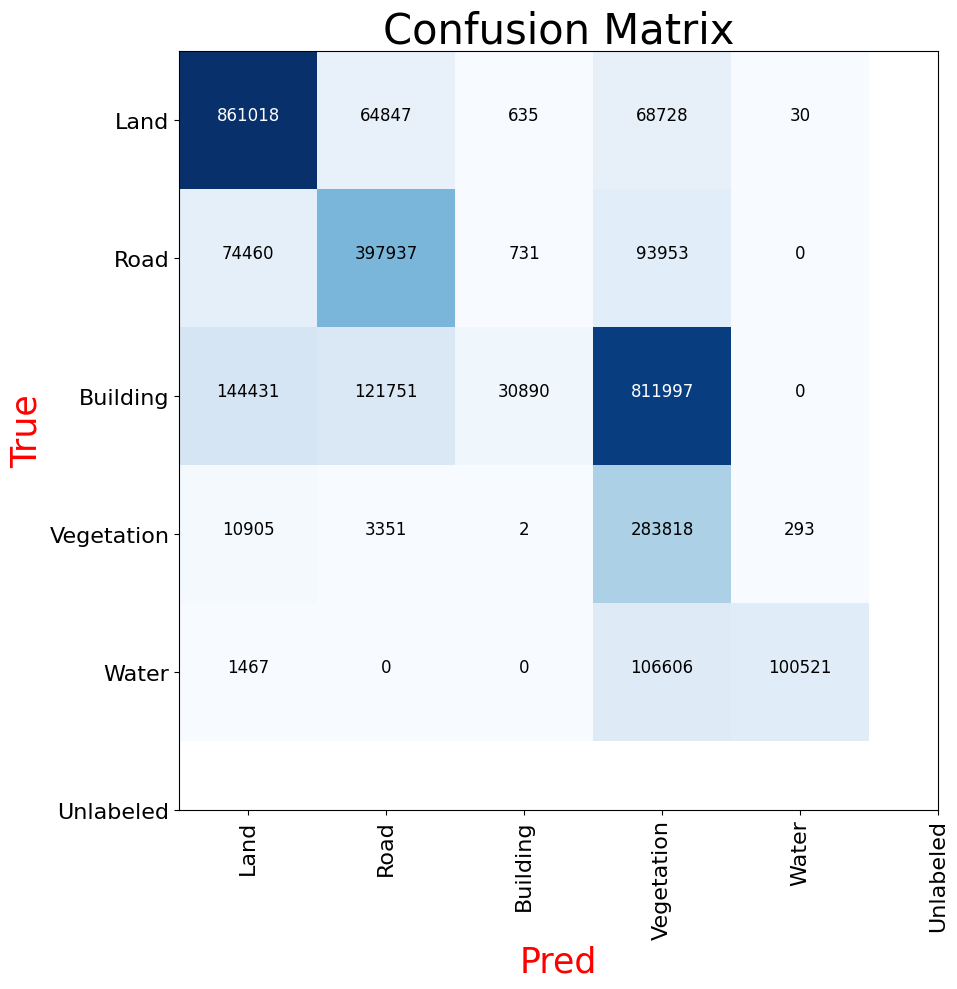

In [24]:
cnf_matrix_plotter(confusion_matrix_model, classes, cmap='Blues')

# 测试集性能评估

In [25]:
# 精度指标
!python tools/test.py pspnet-DubaiDataset_20230612.py work_dirs/DubaiDataset/iter_3000.pth

06/14 12:21:10 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.8.16 (default, Jun 12 2023, 18:09:05) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 3060
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.6, V11.6.124
    GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 1.10.1+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50

In [26]:
# 速度指标
!python tools/analysis_tools/benchmark.py pspnet-DubaiDataset_20230612.py work_dirs/DubaiDataset/iter_3000.pth

Run 1:
/root/autodl-tmp/mmseg/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/root/autodl-tmp/mmseg/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
Loads checkpoint by local backend from path: work_dirs/DubaiDataset/iter_3000.pth
/root/miniconda3/envs/mmseg/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/root/miniconda3/envs/mmseg/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rco